# Sentiment Based Product Recommendation System

Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks:

- Data sourcing and sentiment analysis
- Building a recommendation system
- Improving the recommendations using the sentiment analysis model
- Deploying the end-to-end project with a user interface

## 1. Data sourcing and sentiment analysis

### Import Libraries

In [2]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, spacy, string
import en_core_web_sm
from nltk.corpus import stopwords
nlp = spacy.load("en_core_web_sm")

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhanjith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dhanjith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dhanjith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dhanjith\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install Pillow


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Data Cleaning

In [68]:
data = pd.read_csv("sample30.csv")

In [69]:
#Common functions

# Created a function to avoid writing duplicate code, the above 2 graphs have been clubbed into the below function
def eda_graph(column1): 
    rot_cols=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
    ax= sns.countplot(x=column1,hue='user_sentiment_flag',data=data,palette=["r","g"])  
    if column1 in rot_cols:
        plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        plt.xticks(rotation=0)
    ax.legend(loc=1)
    bar1=(data[[column1,'user_sentiment']].groupby(by=column1).mean().sort_values(by='user_sentiment',ascending=False)*100).plot.bar()
    if column1 in rot_cols:
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=0)    
    plt.ylabel('Percentage of defaulters')
    bar1.legend_.remove()
    plt.show()

In [70]:
data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [71]:
data.shape

(30000, 15)

In [72]:
data.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [73]:
for i in data.columns:
    print(f"The column {i} has {data[i].isnull().sum()} null values")

The column id has 0 null values
The column brand has 0 null values
The column categories has 0 null values
The column manufacturer has 141 null values
The column name has 0 null values
The column reviews_date has 46 null values
The column reviews_didPurchase has 14068 null values
The column reviews_doRecommend has 2570 null values
The column reviews_rating has 0 null values
The column reviews_text has 0 null values
The column reviews_title has 190 null values
The column reviews_userCity has 28071 null values
The column reviews_userProvince has 29830 null values
The column reviews_username has 63 null values
The column user_sentiment has 1 null values


In [74]:
#View and drop the columns with null values >= 40%
to_delete_columns=[]
for i in data.columns:
    if round((data[i].isnull().sum()/data.shape[0])*100,2)>40:
        print(f"{i} ---- {round((data[i].isnull().sum()/data.shape[0])*100,2)}")
        to_delete_columns.append(i)

reviews_didPurchase ---- 46.89
reviews_userCity ---- 93.57
reviews_userProvince ---- 99.43


In [75]:
data.drop(axis=1,columns = to_delete_columns, inplace=True)

In [76]:
data.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_doRecommend', 'reviews_rating', 'reviews_text',
       'reviews_title', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [77]:
data[data['manufacturer'].isnull()]['brand'].value_counts()

Summit Entertainment    141
Name: brand, dtype: int64

In [78]:
# The manufacturer is empty for all 'Summit Entertaintment' items. Let's replace null with 'Other - Summit' to handle the null values
data['manufacturer'].fillna(value='Other-Summit', inplace=True)

In [79]:
data[data['user_sentiment'].isnull()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,True,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,7.87E+11,NaN


In [80]:
data['user_sentiment'].value_counts()

Positive    26632
Negative     3367
Name: user_sentiment, dtype: int64

In [81]:
# User sentiment has only 1 null - updating the value as per reviews_text
data['user_sentiment'].fillna(value='Positive', inplace=True)

In [82]:
data[data['reviews_title'].isnull()].shape

(190, 12)

In [83]:
data[data['reviews_title'].isnull()]['user_sentiment'].value_counts()

Positive    168
Negative     22
Name: user_sentiment, dtype: int64

In [84]:
# The null values in review title is updated as per the user sentiment column as Other-Positive or Other-Negative
data['reviews_title'].fillna('Other-'+data['user_sentiment'],inplace=True)

In [85]:
data[(data['reviews_title']=='Other-Positive') | (data['reviews_title']=='Other-Negative')].shape

(190, 12)

In [86]:
# reviews_username, reviews_date & id are not very intuitive columns and hence can be removed
data.drop(axis=1,columns = ['reviews_username','id','reviews_date'], inplace=True)

In [87]:
for i in data.columns:
    if round((data[i].isnull().sum()/data.shape[0])*100,2)>0:
        print(f"{i} ---- {round((data[i].isnull().sum()/data.shape[0])*100,2)}")

reviews_doRecommend ---- 8.57


In [88]:
data[data['reviews_doRecommend'].isnull()].shape

(2570, 9)

In [89]:
data[['reviews_doRecommend','user_sentiment']].value_counts(normalize=True)*100

reviews_doRecommend  user_sentiment
True                 Positive          85.665330
                     Negative           8.683923
False                Positive           3.623770
                     Negative           2.026978
dtype: float64

In [90]:
data[data['reviews_doRecommend'].isnull()]['user_sentiment'].value_counts()

Positive    2141
Negative     429
Name: user_sentiment, dtype: int64

In [91]:
# As per the findings above, 85% of the Positive sentiment people are bound to recommend, rest of the negative sentiment are not bound to recommend
# Hadling the null values in reviews_doRecommend using this logic
data['reviews_doRecommend'] = data.apply(
            lambda row: 'True' if row['user_sentiment'] == 'Positive' else row['reviews_doRecommend'],
            axis=1
        )
data['reviews_doRecommend'] = data.apply(
            lambda row: 'False' if row['user_sentiment'] == 'Negative' else row['reviews_doRecommend'],
            axis=1
        )

In [92]:
data.columns

Index(['brand', 'categories', 'manufacturer', 'name', 'reviews_doRecommend',
       'reviews_rating', 'reviews_text', 'reviews_title', 'user_sentiment'],
      dtype='object')

### Exploratory Data Analysis

In [93]:
# Setting the user_sentiment to numerical to try and make some graphs out of it
data['user_sentiment_flag']=np.where(data.user_sentiment=='Positive',1,0)

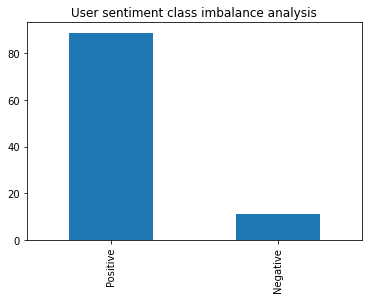

In [94]:
### Analyzing the user_sentiment Variable
(data.user_sentiment.value_counts(normalize=True)*100).plot.bar()
plt.title('User sentiment class imbalance analysis')
plt.show()

Insight:
    
    - It is an unbalanced dataset
    - Will require handling of class imbalance

In [95]:
data['brand'].value_counts(ascending=False)

Clorox                   10585
Warner Home Video         3325
Disney                    1200
L'oreal Paris             1186
FOX                        887
                         ...  
Pacific Natural Foods        1
Noosa                        1
Southern Enterprises         1
SLOAN VALVE COMPANY          1
Universal Music              1
Name: brand, Length: 214, dtype: int64

In [96]:
data['brand'].value_counts(ascending=False).nlargest(n=20)

Clorox                        10585
Warner Home Video              3325
Disney                         1200
L'oreal Paris                  1186
FOX                             887
Burt's Bees                     881
Sony Pictures                   845
Summit Entertainment            813
Nexxus                          693
Universal Home Video            668
Olay                            637
Warner Bros.                    458
Lundberg                        414
Clear Scalp & Hair Therapy      372
Hoover                          362
Windex                          348
Avery                           314
Aveeno                          313
Pendaflex                       310
Tostitos                        286
Name: brand, dtype: int64

In [97]:
data['brand'].value_counts().iloc[:20].index

Index(['Clorox', 'Warner Home Video', 'Disney', 'L'oreal Paris', 'FOX',
       'Burt's Bees', 'Sony Pictures', 'Summit Entertainment', 'Nexxus',
       'Universal Home Video', 'Olay', 'Warner Bros.', 'Lundberg',
       'Clear Scalp & Hair Therapy', 'Hoover', 'Windex', 'Avery', 'Aveeno',
       'Pendaflex', 'Tostitos'],
      dtype='object')

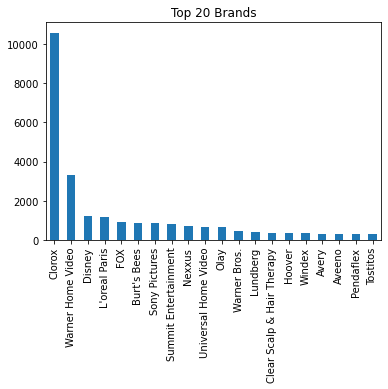

In [98]:
(data['brand'].value_counts(ascending=False).nlargest(n=20)).plot.bar()
plt.title('Top 20 Brands')
plt.show()

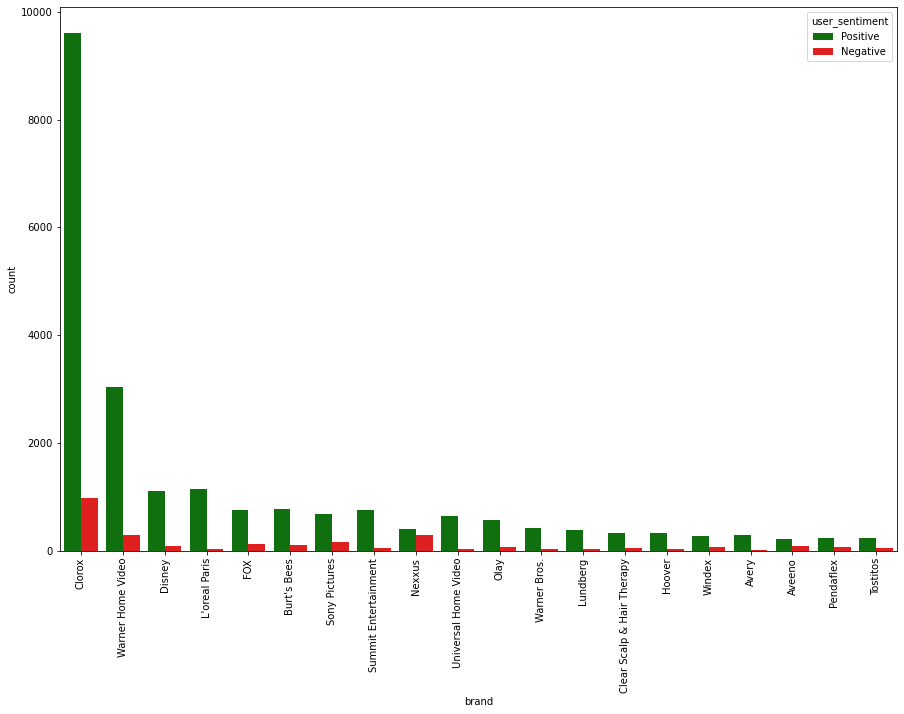

In [99]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='brand',hue='user_sentiment',data=data,order=data['brand'].value_counts().iloc[:20].index,palette=["g","r"]) 
plt.xticks(rotation='vertical')
plt.show()

In [100]:
data[data['user_sentiment']=='Positive']['brand'].value_counts().nlargest(n=20)

Clorox                        9608
Warner Home Video             3034
L'oreal Paris                 1147
Disney                        1116
Burt's Bees                    776
FOX                            759
Summit Entertainment           755
Sony Pictures                  686
Universal Home Video           641
Olay                           568
Warner Bros.                   420
Nexxus                         405
Lundberg                       379
Hoover                         331
Clear Scalp & Hair Therapy     323
Avery                          299
Windex                         278
Storkcraft                     250
Pendaflex                      245
Tostitos                       236
Name: brand, dtype: int64

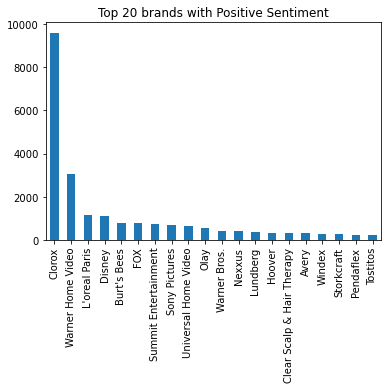

In [101]:
(data[data['user_sentiment']=='Positive']['brand'].value_counts().nlargest(n=20)).plot.bar()
plt.title('Top 20 brands with Positive Sentiment')
plt.show()

In [102]:
data[data['user_sentiment']=='Negative']['brand'].value_counts().nlargest(n=20)

Clorox                        977
Warner Home Video             291
Nexxus                        288
Sony Pictures                 159
FOX                           128
Burt's Bees                   105
Aveeno                         92
Disney                         84
Windex                         70
Olay                           69
Pendaflex                      65
Summit Entertainment           58
Tostitos                       50
Clear Scalp & Hair Therapy     49
Just For Men                   48
Chester's                      42
L'oreal Paris                  39
Vicks                          39
Warner Bros.                   38
Hormel                         38
Name: brand, dtype: int64

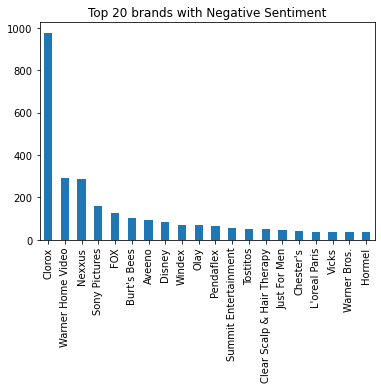

In [103]:
(data[data['user_sentiment']=='Negative']['brand'].value_counts().nlargest(n=20)).plot.bar()
plt.title('Top 20 brands with Negative Sentiment')
plt.show()

In [104]:
data[data['user_sentiment']=='Negative']['brand'].value_counts().nlargest(n=20)

Clorox                        977
Warner Home Video             291
Nexxus                        288
Sony Pictures                 159
FOX                           128
Burt's Bees                   105
Aveeno                         92
Disney                         84
Windex                         70
Olay                           69
Pendaflex                      65
Summit Entertainment           58
Tostitos                       50
Clear Scalp & Hair Therapy     49
Just For Men                   48
Chester's                      42
L'oreal Paris                  39
Vicks                          39
Warner Bros.                   38
Hormel                         38
Name: brand, dtype: int64

Insight:
    
    - The top 10 brands with max Positive reviews: 'Clorox', 'Warner Home Video', 'L'oreal Paris', 'Disney', 'Burt's Bees',
       'FOX', 'Summit Entertainment', 'Sony Pictures', 'Universal Home Video', 'Olay'
    - The top 10 brands with max Negative reviews: 'Clorox', 'Warner Home Video', 'Nexxus', 'Sony Pictures', 'FOX',
       'Burt's Bees', 'Aveeno', 'Disney', 'Windex', 'Olay'

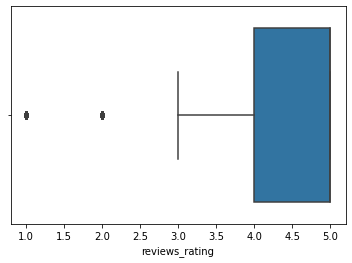

In [105]:
sns.boxplot(data['reviews_rating'])
plt.show()

In [106]:
data['reviews_rating'].value_counts(normalize=True)*100

5    69.436667
4    20.066667
1     4.613333
3     4.483333
2     1.400000
Name: reviews_rating, dtype: float64

Insight:
    
    - As we have already seen from the class imbalance of user sentiment, the ratings are also imbalanced.    
    - You can see 89% of the ratings are above 3 rating.
    - There is less than 9% of ratings that are equal or less than 3

In [107]:
data['manufacturer'].value_counts(ascending=False).nlargest(n=20)

Clorox                    8546
Test                      3325
AmazonUs/CLOO7            2039
L'oreal Paris             1232
Walt Disney               1143
Burt's Bees                873
SONY CORP                  845
Twentieth Century Fox      757
P&G                        730
Nexxus Beauty Products     693
Summit Entertainment       672
Universal                  668
Lundberg Family Farms      412
Clear                      372
Hoover                     362
Windex                     348
Aveeno Baby                313
Avery Dennison             313
Esselte Corporation        310
Tostitos                   265
Name: manufacturer, dtype: int64

In [108]:
data[data['user_sentiment']=='Positive']['manufacturer'].value_counts().nlargest(n=20)

Clorox                    7730
Test                      3034
AmazonUs/CLOO7            1878
L'oreal Paris             1188
Walt Disney               1063
Burt's Bees                768
SONY CORP                  686
Twentieth Century Fox      641
Universal                  641
Summit Entertainment       638
P&G                        623
Nexxus Beauty Products     405
Lundberg Family Farms      377
Hoover                     331
Clear                      323
Avery Dennison             298
Windex                     278
1200                       250
Esselte Corporation        245
TIME WARNER                224
Name: manufacturer, dtype: int64

In [109]:
data[data['user_sentiment']=='Negative']['manufacturer'].value_counts().nlargest(n=20)

Clorox                    816
Test                      291
Nexxus Beauty Products    288
AmazonUs/CLOO7            161
SONY CORP                 159
Twentieth Century Fox     116
P&G                       107
Burt's Bees               105
Aveeno Baby                92
Walt Disney                80
Windex                     70
Esselte Corporation        65
Tostitos                   49
Clear                      49
Combe Incorporated         48
Frito-Lay                  48
L'oreal Paris              44
Hormel                     38
Lundberg Family Farms      35
Summit Entertainment       34
Name: manufacturer, dtype: int64

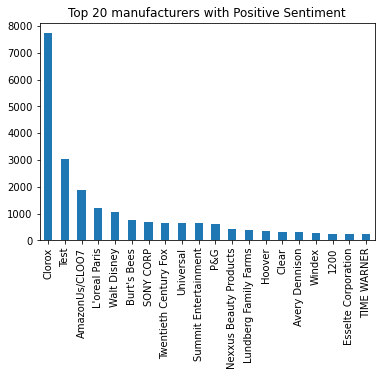

In [110]:
(data[data['user_sentiment']=='Positive']['manufacturer'].value_counts().nlargest(n=20)).plot.bar()
plt.title('Top 20 manufacturers with Positive Sentiment')
plt.show()

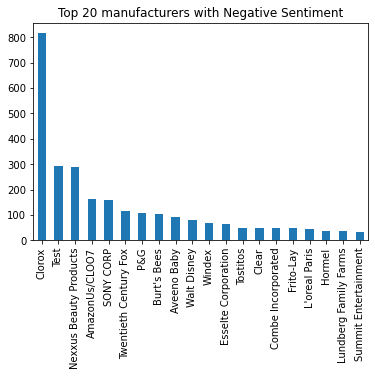

In [111]:
(data[data['user_sentiment']=='Negative']['manufacturer'].value_counts().nlargest(n=20)).plot.bar()
plt.title('Top 20 manufacturers with Negative Sentiment')
plt.show()

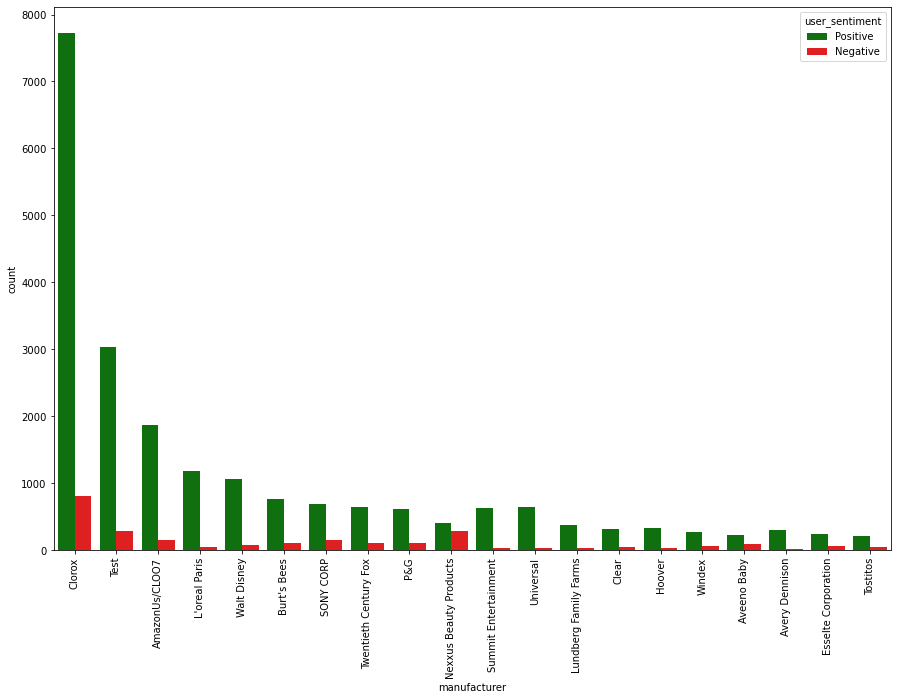

In [112]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='manufacturer',hue='user_sentiment',data=data,order=data['manufacturer'].value_counts().iloc[:20].index,palette=["g","r"]) 
plt.xticks(rotation='vertical')
plt.show()

Insight:
    
    - The top 10 manufacturers with max Positive reviews: 'Clorox', 'Test', 'AmazonUs/CLOO7', 'L'oreal Paris', 'Walt Disney'
        ,'Burt's Bees', 'SONY CORP', 'Twentieth Century Fox', 'Universal', 'Summit Entertainment'
    - The top 10 manufacturers with max Negative reviews:'Clorox', 'Test', 'Nexxus Beauty Products', 'AmazonUs/CLOO7',
       'SONY CORP', 'Twentieth Century Fox', 'P&G', 'Burt's Bees','Aveeno Baby', 'Walt Disney'

In [113]:
data.columns

Index(['brand', 'categories', 'manufacturer', 'name', 'reviews_doRecommend',
       'reviews_rating', 'reviews_text', 'reviews_title', 'user_sentiment',
       'user_sentiment_flag'],
      dtype='object')

In [114]:
data['name'].value_counts(ascending=False).nlargest(n=20)

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                        8545
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                  3325
Clorox Disinfecting Bathroom Cleaner                                                             2039
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz                   1186
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                              1143
Burt's Bees Lip Shimmer, Raisin                                                                   873
The Resident Evil Collection 5 Discs (blu-Ray)                                                    845
Mike Dave Need Wedding Dates (dvd + Digital)                                                      757
Nexxus Exxtra Gel Style Creation Sculptor                                                         693
Red (special Edition) (dvdvideo)                                                  

In [115]:
data[data['user_sentiment']=='Positive']['name'].value_counts().nlargest(n=20)

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                        7729
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                  3034
Clorox Disinfecting Bathroom Cleaner                                                             1878
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz                   1147
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                              1063
Burt's Bees Lip Shimmer, Raisin                                                                   768
The Resident Evil Collection 5 Discs (blu-Ray)                                                    686
Mike Dave Need Wedding Dates (dvd + Digital)                                                      641
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                                              641
Red (special Edition) (dvdvideo)                                                  

Insight:
    
    The Top 10 products with max Positive reviews are :
    
    'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
       'Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd',
       'Clorox Disinfecting Bathroom Cleaner',
       'L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz',
       'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
       'Burt's Bees Lip Shimmer, Raisin',
       'The Resident Evil Collection 5 Discs (blu-Ray)',
       'Mike Dave Need Wedding Dates (dvd + Digital)',
       'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)',
       'Red (special Edition) (dvdvideo)'     
        

### Text preprocessing

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   brand                30000 non-null  object
 1   categories           30000 non-null  object
 2   manufacturer         30000 non-null  object
 3   name                 30000 non-null  object
 4   reviews_doRecommend  30000 non-null  object
 5   reviews_rating       30000 non-null  int64 
 6   reviews_text         30000 non-null  object
 7   reviews_title        30000 non-null  object
 8   user_sentiment       30000 non-null  object
 9   user_sentiment_flag  30000 non-null  int32 
dtypes: int32(1), int64(1), object(8)
memory usage: 2.2+ MB


In [117]:
data['reviews_text']

0        i love this album. it's very good. more to the...
1        Good flavor. This review was collected as part...
2                                             Good flavor.
3        I read through the reviews on here before look...
4        My husband bought this gel for us. The gel cau...
                               ...                        
29995    I got this conditioner with Influenster to try...
29996    I love it , I received this for review purpose...
29997    First of all I love the smell of this product....
29998    I received this through Influenster and will n...
29999    I received this product complimentary from inf...
Name: reviews_text, Length: 30000, dtype: object

In [118]:
# performing basic text cleaning like lowercasing the characters, removing text in square brackets
# removing punctuations, removing masked characters
import re
from nltk.stem import WordNetLemmatizer
def basic_cleaning(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]','',text)
    text = re.sub(r'[^\w\s]', '',text)
    text = re.sub(r'[\d]','',text)
    text = re.sub(r'[*x]?','',text)
    text = re.sub('[0-9]+', '', text)    
    return text

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def lemmatize_verbs(words):    
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def preprocess_and_lemmatize(input_text):
    input_text = basic_cleaning(input_text)
    words = nltk.word_tokenize(input_text)
    words = remove_stopwords(words)
    lemmas = lemmatize_verbs(words)
    return ' '.join(lemmas)

In [119]:
data['reviews_text']=data['reviews_text'].astype(str)
data['reviews_text_lemmatized']=data['reviews_text'].apply(preprocess_and_lemmatize)

In [120]:
data[['reviews_text','reviews_text_lemmatized']]

,reviews_text,reviews_text_lemmatized
0,i love this album. it's very good. more to the...,love album good hip hop side current pop sound...
1,Good flavor. This review was collected as part...,good flavor review collect part promotion
2,Good flavor.,good flavor
3,I read through the reviews on here before look...,read review look buy one couple lubricants ult...
4,My husband bought this gel for us. The gel cau...,husband buy gel us gel cause irritation felt l...
...,...,...
29995,I got this conditioner with Influenster to try...,get conditioner influenster try im love far oi...
29996,"I love it , I received this for review purpose...",love receive review purpose influenster leave ...
29997,First of all I love the smell of this product....,first love smell product wash hair smooth easy...
29998,I received this through Influenster and will n...,receive influenster never go back anything els...


In [121]:
data_sa = data[['reviews_text_lemmatized','user_sentiment_flag']]
data_sa.head(1)

,reviews_text_lemmatized,user_sentiment_flag
0,love album good hip hop side current pop sound...,1


#### Find the top 40 words by frequency among all the reviews after processing the text

(-0.5, 399.5, 199.5, -0.5)

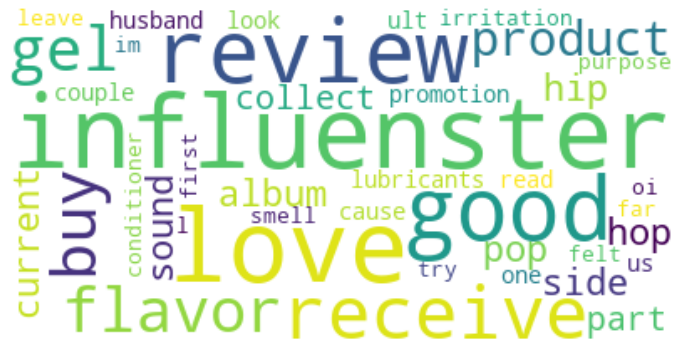

In [122]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=60, max_words=40, 
                      background_color="white", random_state=100, 
                      stopwords=stopwords).generate(str(data_sa['reviews_text_lemmatized']))
plt.figure(figsize=[12,12])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [123]:
#Write your code here to find the top 30 unigram frequency among the Reviews
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

def get_top_ngrams(text, n=None, ngram=(1,1)):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram).fit(text)
    bagofwords = vec.transform(text)
    sum_words = bagofwords.sum(axis=0)
    words_frequency = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
    words_frequency = sorted(words_frequency, key = lambda x: x[1], reverse=True)
    return words_frequency[:n]

In [124]:
#Print the top 30 words in the unigram frequency
top_30words = get_top_ngrams(data_sa['reviews_text_lemmatized'].values.astype('U'), n=30, ngram=(1,1))
data_unigram = pd.DataFrame(top_30words, columns=['unigram', 'count'])
data_unigram

,unigram,count
0,use,13088
1,love,9898
2,review,9377
3,great,8865
4,collect,8769
5,promotion,8747
6,clean,7711
7,product,7675
8,wipe,6609
9,movie,6235


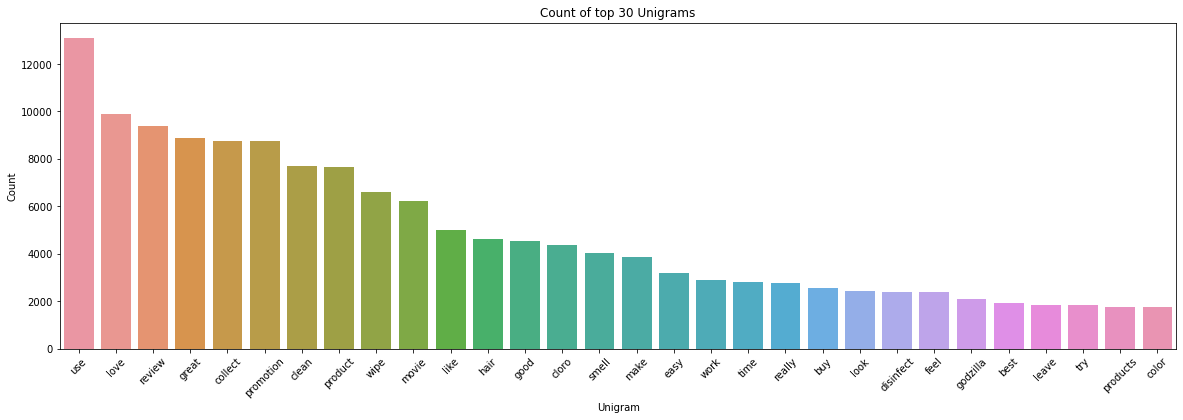

In [125]:
# Plotting top 30 Unigrams
plt.figure(figsize=[20,6])
sns.barplot(x=data_unigram['unigram'], y=data_unigram['count'])
plt.xticks(rotation=45)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 30 Unigrams")
plt.show()

In [126]:
#Print the top 10 words in the unigram frequency
data_unigram.head(10)

,unigram,count
0,use,13088
1,love,9898
2,review,9377
3,great,8865
4,collect,8769
5,promotion,8747
6,clean,7711
7,product,7675
8,wipe,6609
9,movie,6235


In [127]:
#Write your code here to find the top 30 bigram frequency among the reviews
top_30words = get_top_ngrams(data_sa['reviews_text_lemmatized'].values.astype('U'), n=30, ngram=(2,2))
data_bigram = pd.DataFrame(top_30words, columns=['bigram', 'count'])
data_bigram

,bigram,count
0,review collect,8743
1,collect promotion,8743
2,cloro wipe,1998
3,easy use,1290
4,use cloro,1063
5,love cloro,923
6,use product,866
7,great product,772
8,love product,769
9,disinfect wipe,713


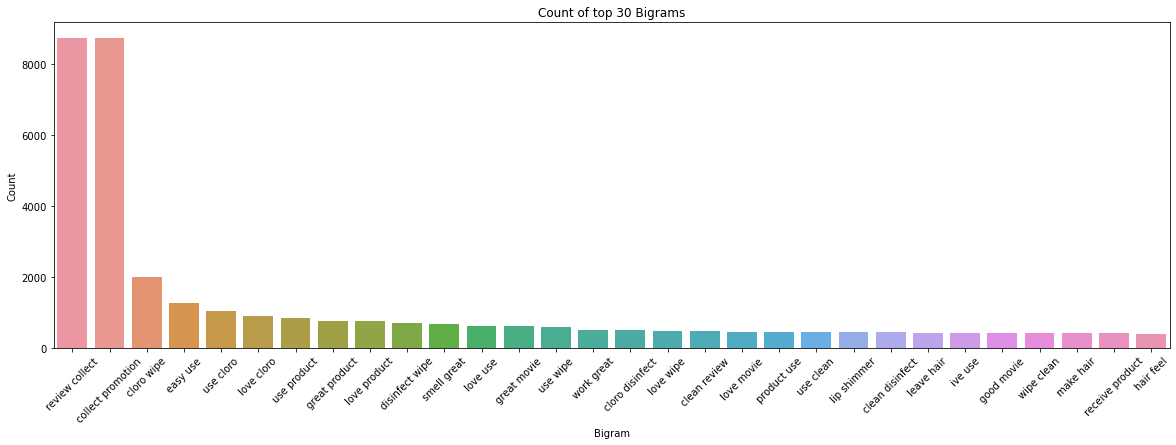

In [128]:
# Plotting top 30 Bigrams
plt.figure(figsize=[20,6])
sns.barplot(x=data_bigram['bigram'], y=data_bigram['count'])
plt.xticks(rotation=45)
plt.xlabel("Bigram")
plt.ylabel("Count")
plt.title("Count of top 30 Bigrams")
plt.show()

In [129]:
#Print the top 10 words in the bigram frequency
data_bigram.head(10)

,bigram,count
0,review collect,8743
1,collect promotion,8743
2,cloro wipe,1998
3,easy use,1290
4,use cloro,1063
5,love cloro,923
6,use product,866
7,great product,772
8,love product,769
9,disinfect wipe,713


### Sentiment Analysis

In [130]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [131]:
data_sa.head(1)

,reviews_text_lemmatized,user_sentiment_flag
0,love album good hip hop side current pop sound...,1


In [132]:
import pickle
from pathlib import Path
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(data_sa['reviews_text_lemmatized'])
X = tfidf_vectorizer.transform(data_sa['reviews_text_lemmatized'])
y = data_sa['user_sentiment_flag']

# Saving the vocabulary used in tfidf vectorizer as features
pickle.dump(tfidf_vectorizer.vocabulary_, open("features.pkl","wb"))

# Split train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [145]:
counter = Counter(y_train)
print("Before: ",counter1)

Before:  Counter({1: 20029, 0: 2471})


In [146]:
# Handling Class imbalance using SMOTE technique
from collections import Counter
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

In [147]:
counter = Counter(y_train_smote)
print("After: ",counter)

After:  Counter({1: 20029, 0: 20029})


### Model Building

In [148]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, f1_score, recall_score, accuracy_score, precision_score, classification_report, confusion_matrix
metrics = []
def report_accuracy(final_model,model_name):
    print ('Accuracy: ', accuracy_score(y_test, final_model.predict(X_test)))
    print ('F1 score: ', f1_score(y_test, final_model.predict(X_test)))
    print ('Recall: ', recall_score(y_test, final_model.predict(X_test)))
    print ('Precision: ', precision_score(y_test, final_model.predict(X_test)))
    print ('ROC AUC: ', roc_auc_score(y_test, final_model.predict(X_test)))    
    print ('\n clasification report:\n', classification_report(y_test, final_model.predict(X_test)))
    print ('\n confussion matrix:\n',confusion_matrix(y_test, final_model.predict(X_test)))
    metrics.append(dict({'Model_name':model_name,
                       'Accuracy':accuracy_score(y_test, final_model.predict(X_test)),
                       'Roc_auc_score':roc_auc_score(y_test, final_model.predict(X_test)),
                       'Precision':precision_score(y_test, final_model.predict(X_test)),
                        'Recall':recall_score(y_test, final_model.predict(X_test)),
                       'F1_score':f1_score(y_test, final_model.predict(X_test))
                        }))

def display_score(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    plot_confusion_matrix(classifier, X_test, y_test,include_values=True,values_format='g',cmap=plt.cm.Blues) 
    print(classifier)

#### Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [150]:
report_accuracy(model_lr,"Logistic Regression")

Accuracy:  0.9173333333333333
F1 score:  0.95209395765724
Recall:  0.9329194427619625
Precision:  0.9720732092142632
ROC AUC:  0.8676873999524098

 clasification report:
               precision    recall  f1-score   support

           0       0.62      0.80      0.70       896
           1       0.97      0.93      0.95      6604

    accuracy                           0.92      7500
   macro avg       0.80      0.87      0.83      7500
weighted avg       0.93      0.92      0.92      7500


 confussion matrix:
 [[ 719  177]
 [ 443 6161]]


LogisticRegression()


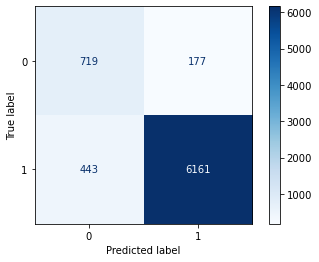

In [152]:
display_score(model_lr)

#### Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import GridSearchCV
model_rf = RandomForestClassifier()
model_rf.fit(X_train_smote,y_train_smote)

RandomForestClassifier()

In [154]:
report_accuracy(model_rf,"Random Forest - Before HPT")

Accuracy:  0.9144
F1 score:  0.9525498891352548
Recall:  0.9757722592368262
Precision:  0.9304071614207334
ROC AUC:  0.7189129153326987

 clasification report:
               precision    recall  f1-score   support

           0       0.72      0.46      0.56       896
           1       0.93      0.98      0.95      6604

    accuracy                           0.91      7500
   macro avg       0.83      0.72      0.76      7500
weighted avg       0.91      0.91      0.91      7500


 confussion matrix:
 [[ 414  482]
 [ 160 6444]]


RandomForestClassifier()


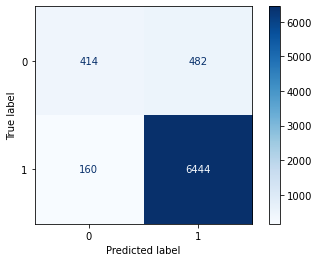

In [155]:
display_score(model_rf)

In [156]:
model_rf_1 = RandomForestClassifier()

hyper_params = {'max_depth': [20, 40, 60],                
                'min_samples_leaf': [10, 20, 30],
                'n_estimators': [50, 80, 100]
               }

model_rf_tuned = GridSearchCV(estimator=model_rf_1,
             param_grid=hyper_params,
             scoring='roc_auc',
             verbose=1,
             cv=3,
             n_jobs=-1,
             return_train_score=True)

model_rf_tuned.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 40, 60],
                         'min_samples_leaf': [10, 20, 30],
                         'n_estimators': [50, 80, 100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [157]:
model_rf_tuned.best_score_

0.9507353779554909

In [158]:
model_rf_tuned.best_estimator_

RandomForestClassifier(max_depth=60, min_samples_leaf=10)

In [159]:
rf_best = model_rf_tuned.best_estimator_

In [160]:
report_accuracy(rf_best,"Random Forest - After HPT")

Accuracy:  0.8741333333333333
F1 score:  0.926719453501009
Recall:  0.9038461538461539
Precision:  0.9507805033450143
ROC AUC:  0.7794900412087912

 clasification report:
               precision    recall  f1-score   support

           0       0.48      0.66      0.55       896
           1       0.95      0.90      0.93      6604

    accuracy                           0.87      7500
   macro avg       0.72      0.78      0.74      7500
weighted avg       0.89      0.87      0.88      7500


 confussion matrix:
 [[ 587  309]
 [ 635 5969]]


RandomForestClassifier(max_depth=60, min_samples_leaf=10)


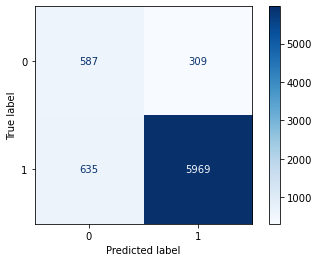

In [161]:
display_score(rf_best)

#### XGBoost

In [162]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve
import xgboost as xgb

In [163]:
model_xgb = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

In [164]:
params = {
        'n_estimators' : [100, 200], # no of trees
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [10,20,30]
        }

folds = 3

param_comb = 30

random_search = RandomizedSearchCV(model_xgb, param_distributions=params, 
                                   n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=-1, cv=3, verbose=3, random_state=42)

In [165]:
random_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                            

In [166]:
print(random_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [167]:
print(random_search.best_score_ )

0.9920702497789785


In [168]:
xgb_best = random_search.best_estimator_

In [169]:
report_accuracy(xgb_best, "XGBoost - After HPT")

Accuracy:  0.9321333333333334
F1 score:  0.9611004967520062
Recall:  0.9521502119927316
Precision:  0.9702206449621972
ROC AUC:  0.8683742131392229

 clasification report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73       896
           1       0.97      0.95      0.96      6604

    accuracy                           0.93      7500
   macro avg       0.83      0.87      0.85      7500
weighted avg       0.94      0.93      0.93      7500


 confussion matrix:
 [[ 703  193]
 [ 316 6288]]


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


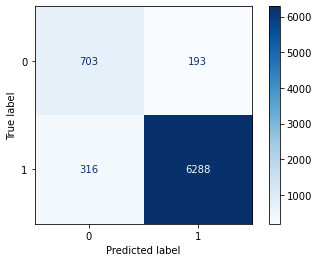

In [170]:
display_score(xgb_best)

In [171]:
# saving the model
# Logistic Reg
pickle.dump(model_lr, open('model_lr.pkl', 'wb'))
# Random forest - before hpt
pickle.dump(model_rf, open('model_rf.pkl', 'wb'))
# Random forest - after hpt
pickle.dump(rf_best, open('rf_best.pkl', 'wb'))
# Xgboost
pickle.dump(xgb_best, open('xgb_best.pkl', 'wb'))
# tfidf_vectorizer
pickle.dump(tfidf_vectorizer, open("tfidf_vectorizer.pkl", "wb"))

In [173]:
metrics

[{'Model_name': 'Logistic Regression',
  'Accuracy': 0.9173333333333333,
  'Roc_auc_score': 0.8676873999524098,
  'Precision': 0.9720732092142632,
  'Recall': 0.9329194427619625,
  'F1_score': 0.95209395765724},
 {'Model_name': 'Random Forest - Before HPT',
  'Accuracy': 0.9144,
  'Roc_auc_score': 0.7189129153326987,
  'Precision': 0.9304071614207334,
  'Recall': 0.9757722592368262,
  'F1_score': 0.9525498891352548},
 {'Model_name': 'Random Forest - After HPT',
  'Accuracy': 0.8741333333333333,
  'Roc_auc_score': 0.7794900412087912,
  'Precision': 0.9507805033450143,
  'Recall': 0.9038461538461539,
  'F1_score': 0.926719453501009},
 {'Model_name': 'XGBoost - After HPT',
  'Accuracy': 0.9321333333333334,
  'Roc_auc_score': 0.8683742131392229,
  'Precision': 0.9702206449621972,
  'Recall': 0.9521502119927316,
  'F1_score': 0.9611004967520062}]

In [212]:
# Metrics evealuation 
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,Recall,F1_score
0,Logistic Regression,0.917333,0.867687,0.972073,0.932919,0.952094
1,Random Forest - Before HPT,0.914400,0.718913,0.930407,0.975772,0.952550
2,Random Forest - After HPT,0.874133,0.779490,0.950781,0.903846,0.926719
3,XGBoost - After HPT,0.932133,0.868374,0.970221,0.952150,0.961100


In [213]:
pickle.dump(metrics_df, open('metrics_df.pkl', 'wb'))

Insight:
    
    - As per the table, Logistic regression and XGBoost seem to provide similar results.
    - To go with the Logistic regression model to keep things simpler.

In [207]:
# To test the model and see if it works
def predict_complaint(sentence, model=model_lr):
    word_vect_custom = tfidf_vectorizer.transform(pd.Series(sentence))
    word_vect_custom_df = pd.DataFrame(word_vect_custom.toarray(),columns=tfidf_vectorizer.get_feature_names())
    custom_pred = model.predict(word_vect_custom_df)      
    print("Positive" if custom_pred[0]==1 else "Negative")   

In [208]:
sentence="This Dettol Handwash Refill is a highly effective and convenient product. It fits perfectly in dispensers, lathers well, and leaves a refreshing, clean feeling. With a pleasant fragrance, it offers peace of mind and excellent value for money due to its long-lasting nature. A must-have for cleanliness and hygiene."

In [209]:
predict_complaint(sentence)

Positive


In [210]:
sentence1="Extremely bad smell - flowery, cheap and too strong. It ended up giving a headache to my husband and severe allergy to me"

In [211]:
predict_complaint(sentence1)

Negative


## 2. Building a recommendation system

- User based recommendation
- User based prediction & evaluation
- Item based recommendation
- Item based prediction & evaluation


In [22]:
ratings = pd.read_csv("sample30.csv")

In [23]:
ratings.head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive


In [24]:
ratings.shape

(30000, 15)

In [25]:
len(ratings['reviews_username'].unique())

24915

In [26]:
ratings[ratings['reviews_username'].isnull()].shape

(63, 15)

In [27]:
ratings[ratings['reviews_username'].isnull()].head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
1453,AVpe_N91LJeJML43z4jD,Way Basics,"Home,Kids' Home,Girls' Room,Girls' Room Furnit...",Way Basics,Way Basics 3-Shelf Eco Narrow Bookcase Storage...,2011-07-08T00:00:00Z,NaN,NaN,4,"We like this shelf, and found it relatively ea...",Way Basics 3-Shelf Storage Unit in Espresso Wo...,NaN,NaN,NaN,Positive


In [28]:
# Removing null value entries in username from the dataset
ratings = ratings[~ratings.reviews_username.isna()]

In [32]:
ratings[ratings['reviews_rating'].isnull()].shape

(0, 15)

In [29]:
ratings.shape

(29937, 15)

#### Dividing the dataset into train and test

In [30]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings, test_size=0.30, random_state=31)

In [31]:
print(train.shape)
print(test.shape)

(20955, 15)
(8982, 15)


#### User based recommendation

In [34]:
# Pivot the train ratings' into matrix format with columns as product ids and rows as username
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)

df_pivot.head(3)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
dummy_train = train.copy()

In [36]:
# Product not rated is marked as 1 for predicting
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [39]:
# Convert the dummy train into matrix format
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

In [40]:
dummy_train.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### User based prediction & evaluation

In [61]:
# Using adjusted cosine similarity
# creating pivot without removing nan values to calculate mean
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
)

In [62]:
from sklearn.metrics.pairwise import pairwise_distances
def adjusted_cosine_similarity(df_mean):
    mean = np.nanmean(df_mean, axis=1)
    df_subtracted = (df_mean.T-mean).T
    user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
    user_correlation[np.isnan(user_correlation)] = 0
    print(user_correlation)

In [63]:
adjusted_cosine_similarity(df_pivot)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [64]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 1.55829543, 3.20256308,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [66]:
user_predicted_ratings.shape

(18212, 255)

In [68]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,6.059436,0.0,0.0,0.0,0.915079,0.0,0.0,...,0.545545,0.0,0.0,0.0,0.0,0.0,0.0,1.558295,3.202563,0.0
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
06stidriver,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [86]:
product_mapping=ratings[['id','brand','categories','manufacturer','name']]
product_mapping.drop_duplicates(subset = 'id',inplace=True)

In [85]:
import pickle 
pickle.dump(user_final_rating,open('user_final_rating.pkl','wb'))

In [87]:
pickle.dump(product_mapping,open('product_mapping.pkl','wb'))

In [177]:
def top_20_user_recommendations(user_input):
    user_final_rating_df=pd.read_pickle('user_final_rating.pkl')
    product_mapping_df=pd.read_pickle('product_mapping.pkl')    
    d = user_final_rating_df.loc[user_input].sort_values(ascending=False)[0:20]
    d = pd.merge(d,product_mapping_df,left_on='id',right_on='id',how = 'left')   
    return d

In [185]:
user_input = input("Enter your user name : ")
top_20_user_recommendations(user_input)

Enter your user name : 06stidriver


,id,06stidriver,brand,categories,manufacturer,name
0,AV13O1A8GV-KLJ3akUyj,0.0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AVpfP-rELJeJML435jEN,0.0,LDR,"Home Improvement,Bathroom Renovation,Bathroom ...",LDR,5302050 15/16 FCT/HOSE ADAPTOR
2,AVpfLnfPLJeJML434HpK,0.0,Pleasant Hearth,"Home Improvement,Heating, Cooling, & Air Quali...","GHP Group, Inc.","Pleasant Hearth 1,800 sq ft Wood Burning Stove..."
3,AVpfM_ytilAPnD_xXIJb,0.0,Tostitos,"Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...",Tostitos,Tostitos Bite Size Tortilla Chips
4,AVpfMpZ51cnluZ0-f_L9,0.0,Chips Ahoy,"Food & Beverage,Cookies, Chips & Snacks,Cookie...",Nabisco Biscuit Company,Chips Ahoy! Original Chocolate Chip - Cookies ...
5,AVpfN6Z71cnluZ0-gZmO,0.0,Caress,"Personal Care,Bath, Shower & Soap,Bar Soap,Bat...",Caress,"Caress Moisturizing Body Bar Natural Silk, 4.75oz"
6,AVpfNVsj1cnluZ0-gNQN,0.0,Physician's Formula,"Personal Care,Makeup,Concealer & Foundation,Fo...",Physicians Formula,Physicians Formula Powder Palette Mineral Glow...
7,AVpfNWbPilAPnD_xXPR7,0.0,Pleasant Hearth,"Home,Home Appliances,Fireplaces & Accessories,...",Pleasant Hearth,"Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black"
8,AVpfNc9cLJeJML434tza,0.0,Feit,"Home,Home Improvement,Light Bulbs,Electrical,A...",FeitElectric,Feit 60-Watt A19 Gu24 Base Led Light Bulb - So...
9,AVpfNfEMLJeJML434uf-,0.0,UNIVERSAL HOME ENTERTAINMENT,"Movies, Music & Books,Movies,Romance,Movies & ...",Universal Studios Home Entertainment,Heiress (dvd)


In [109]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1976, 15)

In [110]:
common.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
21169,AVpfm8yiLJeJML43AYyu,Nexxus,"Personal Care,Hair Care,Styling Gel/Lotion,Bea...",Nexxus Beauty Products,Nexxus Exxtra Gel Style Creation Sculptor,2015-04-13T00:00:00.000Z,False,False,1,What happened The old formula was one of the b...,Truly awful!,NaN,NaN,jjjj,Positive
8538,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-03-14T13:11:25.000Z,NaN,True,5,"it works great, i love the smell it keeps my h...",Love This,Wilmington,NaN,jygibri,Positive
18735,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-27T00:00:00.000Z,False,True,4,I love the smell that you can clean and disinf...,This product is good!,NaN,NaN,jel08,Positive
22417,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy,"Personal Care,Hair Care,Shampoo,Featured Brand...",Clear,Clear Scalp & Hair Therapy Total Care Nourishi...,2016-08-27T00:00:00.000Z,False,False,1,I have been using Clear products for over 3 ye...,Why change a good thing,NaN,NaN,elena79,Positive
19297,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-30T00:00:00.000Z,False,True,5,I love using these wipes whether at home or at...,wonderful smell,NaN,NaN,angc,Positive


In [111]:
# convert into the user-movie matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [112]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [114]:
user_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,18202,18203,18204,18205,18206,18207,18208,18209,18210,18211
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
df_subtracted.head(1)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18202,18203,18204,18205,18206,18207,18208,18209,18210,18211
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
common.head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
21169,AVpfm8yiLJeJML43AYyu,Nexxus,"Personal Care,Hair Care,Styling Gel/Lotion,Bea...",Nexxus Beauty Products,Nexxus Exxtra Gel Style Creation Sculptor,2015-04-13T00:00:00.000Z,False,False,1,What happened The old formula was one of the b...,Truly awful!,NaN,NaN,jjjj,Positive


In [120]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [121]:
user_correlation_df_1.shape

(1660, 18212)

In [122]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [123]:
user_correlation_df_3 = user_correlation_df_2.T

In [124]:
user_correlation_df_3.head()

,1234,123charlie,37f5p,4cloroxl,50cal,7.87E+11,aac06002,abbey,abbi,abby,...,yesseniaw22,yeya,ygtz,yummy,zapman,zburt5,zebras,zippy,zitro,zxcsdfd
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
user_correlation_df_3.shape

(1660, 1660)

In [126]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.28867513, 0.        , 0.        , ..., 2.5423759 , 1.44337567,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [127]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)

In [128]:
dummy_test.shape

(1660, 127)

In [129]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [130]:
common_user_predicted_ratings.head(2)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1h6Gu0glJLPUi8IjA_,...,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [132]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [133]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [134]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.434039100061514


#### Item based recommendation

In [135]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00sab00,01impala,02dakota,02deuce,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,...,zowie,zozo0o,zpalma,zsazsa,zt313,zuttle,zwithanx,zxcsdfd,zyiah4,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [137]:
df_subtracted.head()

reviews_username,00sab00,01impala,02dakota,02deuce,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,...,zowie,zozo0o,zpalma,zsazsa,zt313,zuttle,zwithanx,zxcsdfd,zyiah4,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
from sklearn.metrics.pairwise import pairwise_distances

In [139]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [140]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [141]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00600224, 0.06201728,
        0.        ],
       [0.        , 0.        , 0.01254045, ..., 0.00108461, 0.        ,
        0.        ],
       [0.        , 0.        , 0.02090075, ..., 0.00180769, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00644332],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00644332],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00515466]])

In [142]:
item_predicted_ratings.shape

(18212, 255)

In [143]:
dummy_train.shape

(18212, 255)

In [144]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.011345,0.001677,0.0,0.010336,0.0,0.0,0.033075,0.006002,0.062017,0.000000
01impala,0.0,0.0,0.012540,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.004564,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.001085,0.000000,0.000000
02dakota,0.0,0.0,0.020901,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.007607,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.001808,0.000000,0.000000
02deuce,0.0,0.0,0.016721,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.006085,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.001446,0.000000,0.000000
06stidriver,0.0,0.0,0.000000,0.000454,0.0,0.0,0.0,0.001731,0.001915,0.000000,...,0.000000,0.000000,0.0,0.003187,0.0,0.0,0.000000,0.000000,0.000000,0.006443


In [145]:
import pickle 
pickle.dump(item_final_rating,open('item_final_rating.pkl','wb'))

In [182]:
def top_20_item_recommendations(user_input):
    item_final_rating_df=pd.read_pickle('item_final_rating.pkl')
    product_mapping_df=pd.read_pickle('product_mapping.pkl')    
    d = item_final_rating_df.loc[user_input].sort_values(ascending=False)[0:20]
    d = pd.merge(d,product_mapping_df,left_on='id',right_on='id',how = 'left')   
    return d

In [184]:
user_input = input("Enter your user name : ")
top_20_item_recommendations(user_input)

Enter your user name : 02dakota


,id,02dakota,brand,categories,manufacturer,name
0,AVpe8q4T1cnluZ0-afct,0.086113,Newman's Own Organics,"Food,Packaged Foods,Candy,Soft Candy,Candy & G...",Newman's Own,"Newman's Own Organics Licorice Twist, Black 5oz"
1,AVpe_5U_ilAPnD_xSrxG,0.059206,Sea Gull Lighting,"Home,Home Decor,Lamps & Lighting,Wall Lights,V...",Sea Gull Lighting,Sea Gull Lighting Six Light Bath Sconce/vanity...
2,AVpe41TqilAPnD_xQH3d,0.045578,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital)
3,AV1ZSp2uglJLPUi8IQFy,0.041865,Cetaphil,"Personal Care,Skin Care,Moisturizer,Beauty,Fac...",Cetaphil,"Cetaphil Gentle Skin Cleanser, 2oz"
4,AVpfOmKwLJeJML435GM7,0.036048,Clear Scalp & Hair Therapy,"Personal Care,Hair Care,Shampoo,Featured Brand...",Clear,Clear Scalp & Hair Therapy Total Care Nourishi...
5,AVpfJcHuLJeJML433ZrY,0.029837,Lionsgate Home Entertainment,"Movies, Music & Books,Movies,Sci-Fi & Fantasy,...",Lions Gate,Equals (blu-Ray)
6,AVpfRTh1ilAPnD_xYic2,0.027343,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...
7,AVpfQtEm1cnluZ0-hUpe,0.025843,Jolly Time,"Food,Packaged Foods,Snacks,Popcorn,Packaged Co...",American Pop Corn Co.,Jolly Time Select Premium Yellow Pop Corn
8,AVpf7LysilAPnD_xkm9G,0.022634,Cuisinart,"Kitchen & Dining,Kitchen Appliances,Juicers,Ap...",CUISINART,Cuisinart174 Electric Juicer - Stainless Steel...
9,AV16khLE-jtxr-f38VFn,0.020901,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel


#### Item based prediction & evaluation

In [151]:
common =  test[test.id.isin(train.id)]
common.shape

(8964, 15)

In [152]:
common.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
21384,AVpfm8yiLJeJML43AYyu,Nexxus,"Personal Care,Hair Care,Styling Gel/Lotion,Bea...",Nexxus Beauty Products,Nexxus Exxtra Gel Style Creation Sculptor,2015-03-19T00:00:00.000Z,False,False,1,I bought this gel that I have been using for o...,Bad Hair Day!!!,NaN,NaN,curlyd,Positive
14483,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-02-16T00:00:00.000Z,False,True,5,It's prefect and convenient for a fast clean. ...,LOVE IT,NaN,NaN,prip,Positive
21169,AVpfm8yiLJeJML43AYyu,Nexxus,"Personal Care,Hair Care,Styling Gel/Lotion,Bea...",Nexxus Beauty Products,Nexxus Exxtra Gel Style Creation Sculptor,2015-04-13T00:00:00.000Z,False,False,1,What happened The old formula was one of the b...,Truly awful!,NaN,NaN,jjjj,Positive
25411,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2014-10-19T00:00:00.000Z,NaN,True,5,"If you`ve are into monster movies, you have to...",Godzilla 2014 nuff said!!!,NaN,NaN,internetfreak69,Positive
20351,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-26T00:00:00.000Z,False,True,5,Makes cleaning so much easier and smells great...,Love it!!,NaN,NaN,hb6851,Positive


In [153]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [154]:
common_item_based_matrix.shape

(203, 8348)

In [155]:
item_correlation_df = pd.DataFrame(item_correlation)

In [156]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
item_correlation_df['id'] = df_subtracted.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013954,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.078102,0.0,0.0,0.0,0.0,0.0,0.0,0.001989,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [158]:
list_name = common.id.tolist()

In [159]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [160]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [161]:
item_correlation_df_3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,...,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.013954,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003657,0.0,...,0.0,0.078102,0.0,0.0,0.0,0.0,0.0,0.001989,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [162]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02105944, 0.00045358, 0.00036287, ..., 0.00045358, 0.00018143,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00733409],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.10336214],
       [0.        , 0.00644332, 0.00515466, ..., 0.00644332, 0.00257733,
        0.        ]])

In [163]:
common_item_predicted_ratings.shape

(203, 8348)

In [164]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [165]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [166]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [167]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [168]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5776631107239676


Insight:
    
    - The RMSE is more for the Item based recommendation model as compared to the User based recommendation model.
    - Hence, the best suited model here is the one where error is less : User based recommendation model 